# Import dependencies

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from datetime import datetime
from sqlalchemy import create_engine

                     Origin
DateTime                   
2017-01-01 00:00:00    65.0
2017-01-01 01:00:00   151.0
2017-01-01 02:00:00   133.0
2017-01-01 03:00:00    28.0
2017-01-01 04:00:00     4.0


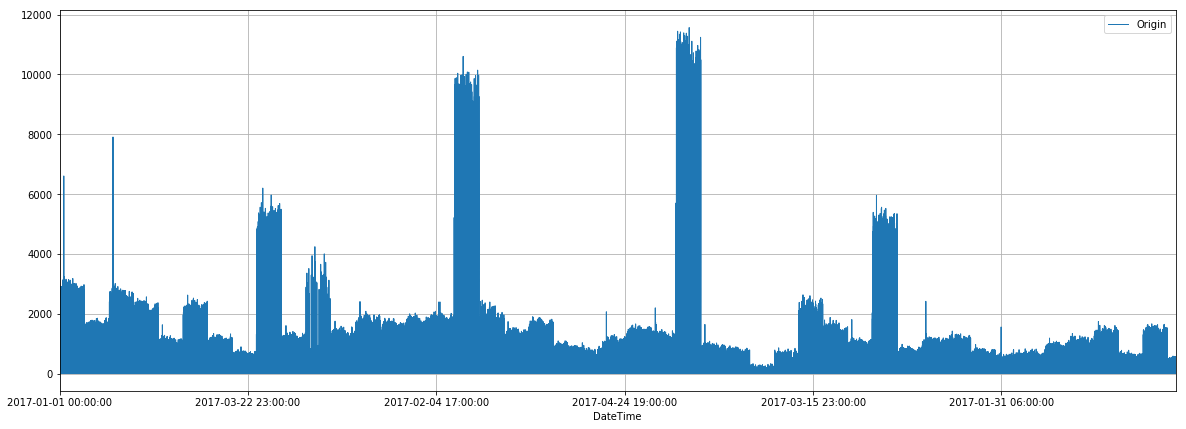

In [2]:

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

from datetime import datetime
series = pd.read_csv('data/FinalDataset.csv', header=0, squeeze=True)
station = series[series['Station']=='COLS']
station = series[series['Year']==2017]
origin = station[['DateTime','Origin']]
origin = origin.set_index('DateTime')


print(origin.head())

plt.rcParams["figure.figsize"] = (20,7)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.grid'] = True


origin.plot()
plt.savefig('images/daily_volume_origin_COLS.png')
plt.show()

# Daily Volume Predictions

In [3]:
origin.index = pd.to_datetime(origin.index)

In [4]:
pd.plotting.register_matplotlib_converters()

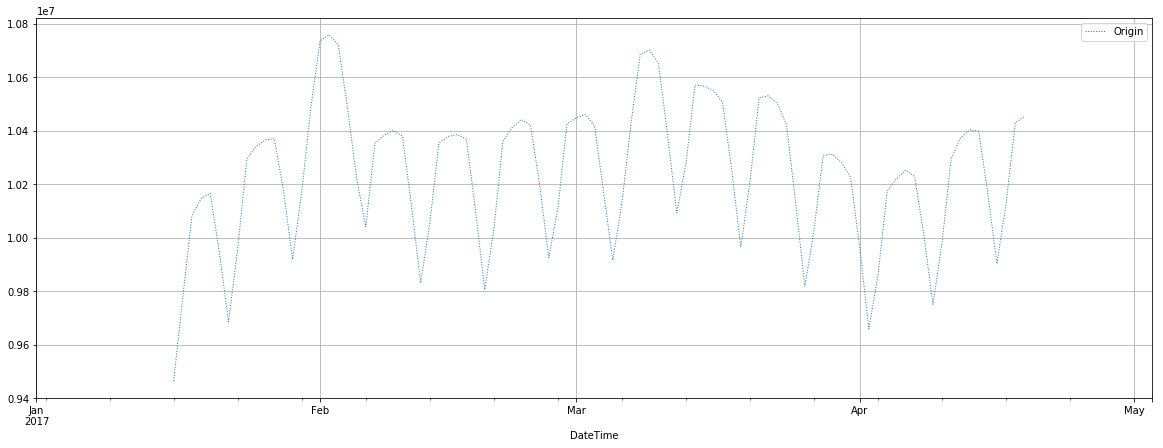

In [5]:
daily = origin.resample("D").sum()
daily.rolling(30, center=True).sum().plot(style=[":", "--", "-"])
plt.savefig('images/daily_volume_historical_COLS.png')

In [6]:
# Use Prophet to predict
df2 = daily
df2.reset_index(inplace=True)
# Prophet requires columnds ds (Date) and y (value)
df2 = df2.rename(columns={'DateTime': 'ds', 'Origin': 'y'})
df2.head()

,ds,y
0,2017-01-01,122773.0
1,2017-01-02,139245.0
2,2017-01-03,366495.0
3,2017-01-04,388842.0
4,2017-01-05,407099.0


In [7]:
# Import Prophet
import fbprophet

In [8]:
# Make the Prophet model and fit the data
df2_prophet = fbprophet.Prophet(interval_width=0.95)
df2_prophet.fit(df2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
# Create future dataframe
df2_forecast = df2_prophet.make_future_dataframe(periods=30*12, freq='D')

In [10]:
# Make predictions
df2_forecast = df2_prophet.predict(df2_forecast)

In [11]:
pd.plotting.register_matplotlib_converters()

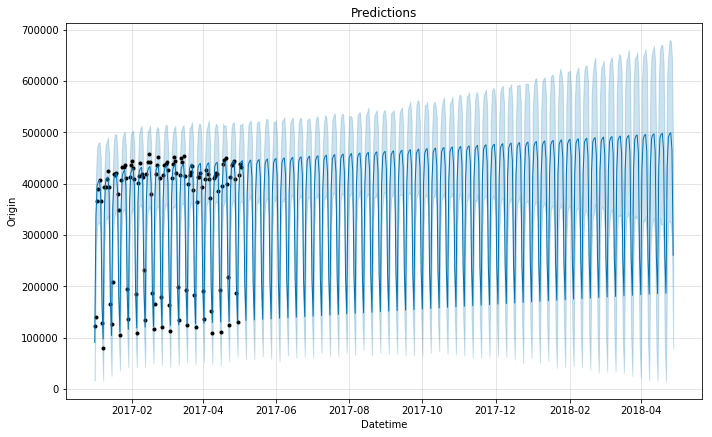

In [12]:
df2_prophet.plot(df2_forecast, xlabel = 'Datetime', ylabel = 'Origin')
plt.title('Predictions')
plt.savefig('images/prediction1_COLS.png')

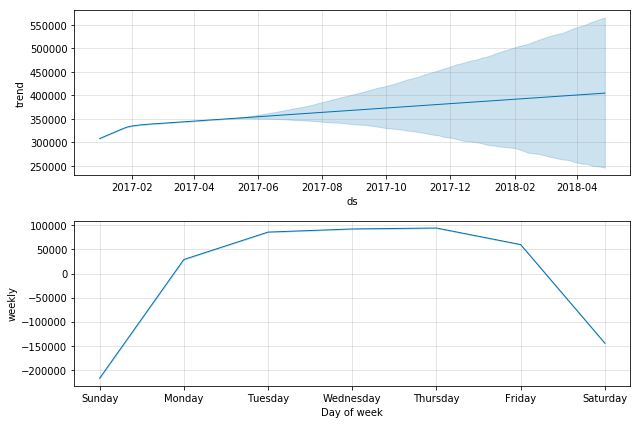

In [13]:
# Plot the trends and patterns
df2_prophet.plot_components(df2_forecast);
plt.savefig('images/prediction2_COLS.png')

# Hourly Volume Predictions

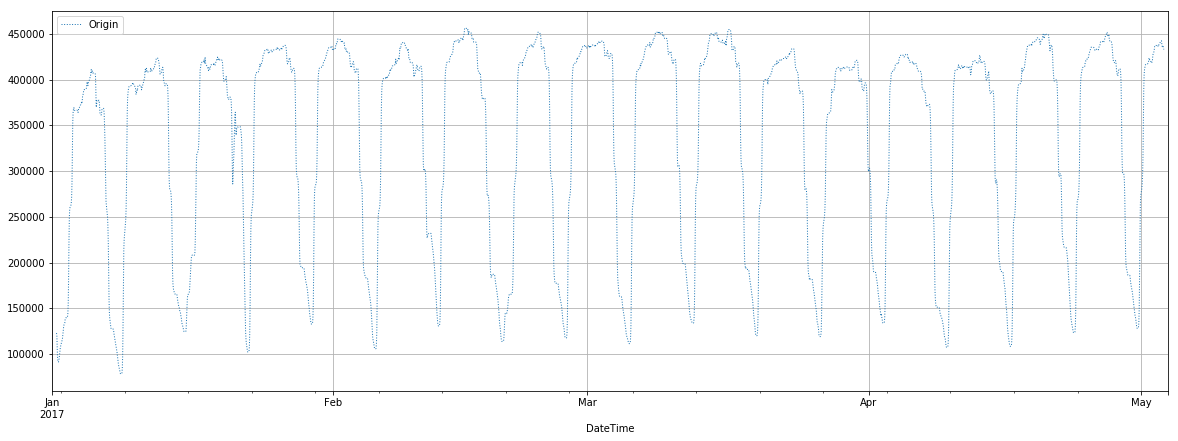

In [14]:
hourly = origin.resample("H").sum()
hourly.rolling(24, center=True).sum().plot(style=[":", "--", "-"])
plt.savefig('images/Historical_hourly_COLS.png')

In [15]:
df3 = hourly
df3.reset_index(inplace=True)
# Prophet requires columnds ds (Date) and y (value)
df3 = df3.rename(columns={'DateTime': 'ds', 'Origin': 'y'})
df3.head()

,ds,y
0,2017-01-01 00:00:00,3264.0
1,2017-01-01 01:00:00,15724.0
2,2017-01-01 02:00:00,10142.0
3,2017-01-01 03:00:00,3744.0
4,2017-01-01 04:00:00,281.0


In [16]:
# Make the Prophet model and fit the data
df3_prophet = fbprophet.Prophet(interval_width=0.95)
df3_prophet.fit(df3)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [17]:
# Create future dataframe
df3_forecast = df3_prophet.make_future_dataframe(periods=300*12, freq='H')

In [18]:
# Make predictions
df3_forecast = df3_prophet.predict(df3_forecast)

In [19]:
pd.plotting.register_matplotlib_converters()

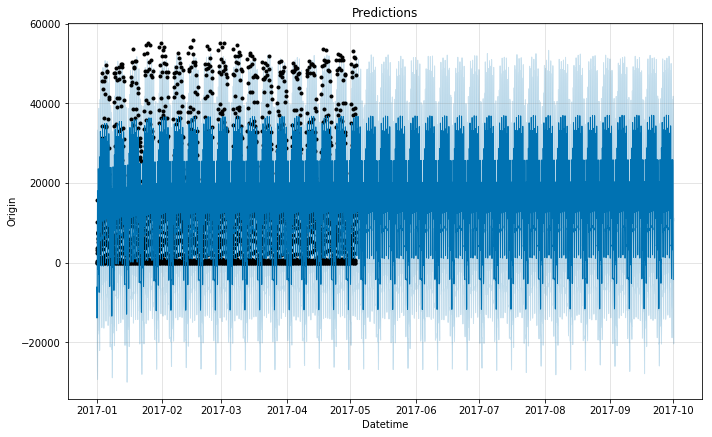

In [20]:
df3_prophet.plot(df3_forecast, xlabel = 'Datetime', ylabel = 'Origin')
plt.title('Predictions')
plt.savefig('images/Predictions_hourly_COLS.png')

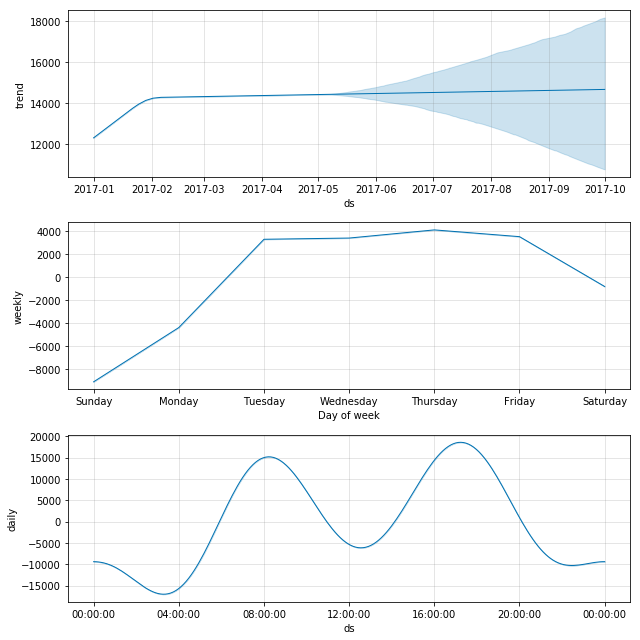

In [21]:
# Plot the trends and patterns
df3_prophet.plot_components(df3_forecast);
plt.savefig('images/Trends_hourly_COLS.png')